# Classification -   Evaluation

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use colab

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib,.. and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

### Hints -

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them.

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [3 points]

* Pre-process the dataset and provide a detailed explanation.  [10 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [10 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [5 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [4points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [10 points]

* Compare the results of the classifier using gini and entropy [6 points]

* Print the decision tree visualization with depth of 5 [6points]
* Perform the Random Forest Classifier(RFC) with the same dataset [6]
* Evaluate the decision tree model and Random Forest Classifier[6]
* Perform and plot the ROC curves for the two classifiers on the same graph[6]
* interpret the ROC graph[6]`
* Demo[18]



# CODE

# Task 1: Import Libraries and Load the Dataset

We start by importing the necessary Python libraries such as pandas for data manipulation, numpy for numerical operations, and matplotlib and seaborn for plotting. We then load the dataset from a CSV file and display the first few rows to ensure it has been loaded correctly.



In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/dataset_DT.csv')  # Adjust the path as per your file location
print(data.head())  # Display the first few entries of the dataset to ensure it is loaded properly

    age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0  unknown  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0  unknown  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0  unknown  no  


# Task 2: Pre-process the Dataset
First, we examine the dataset by checking its general information and statistics. We then replace any occurrences of the string 'unknown' with NaN to simplify handling missing values. Following this, we check for missing values and decide how to handle them: by imputing categorical features with the most frequent category (mode) and numerical features with the median. Finally, we use **LabelEncoder** to convert categorical variables into a format that can be used by machine learning models.



In [27]:
# Display dataset information and statistical summary
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  int64  
 2   marital    18423 non-null  int64  
 3   education  18423 non-null  int64  
 4   default    18423 non-null  int64  
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  int64  
 7   loan       18423 non-null  int64  
 8   contact    18423 non-null  int64  
 9   day        18423 non-null  float64
 10  month      18423 non-null  int64  
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  int64  
 16  y          18423 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 2.4 MB
None
                age           job       marital     education       default

In [28]:
# Replacing 'unknown' values with NaN to treat them as missing values
data.replace('unknown', np.nan, inplace=True)

# Checking for null values in each column
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [29]:
# Imputing missing values: categorical data with mode, numerical data with median
for column in data.columns:
    if data[column].dtype == 'object':  # For categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # For numerical columns
        data[column] = data[column].fillna(data[column].median())

# Encoding categorical data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns[data.dtypes == object]:
    data[col] = le.fit_transform(data[col])

# Display the first few rows of the preprocessed data
print(data.head())

    age  job  marital  education  default  balance  housing  loan  contact  \
0  34.0    1        2          1        0  13408.0        0     0        0   
1  49.0    4        0          2        0  20727.0        0     0        0   
2  32.0    7        2          2        0   1743.0        1     0        0   
3  46.0    4        0          2        0  10469.0        1     0        0   
4  26.0    4        2          2        0   7628.0        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0  1.0      0     647.0       2.0   -1.0       0.0         0  0  
1  1.0      0     285.0       3.0  132.0       2.0         0  0  
2  1.0      0    1156.0       1.0  261.0       3.0         1  0  
3  1.0      0     202.0       2.0   -1.0       0.0         0  0  
4  1.0      0     263.0       1.0   -1.0       0.0         0  0  


# Task 3: Perform Visualizations

In this task, we create visualizations to understand the relationships within the data better. The first visualization shows the subscription rates by job type, helping us identify which professions are more likely to subscribe to a term deposit. The second visualization examines the age distribution of subscribers versus non-subscribers, offering insights into which age groups are more engaged with term deposits.

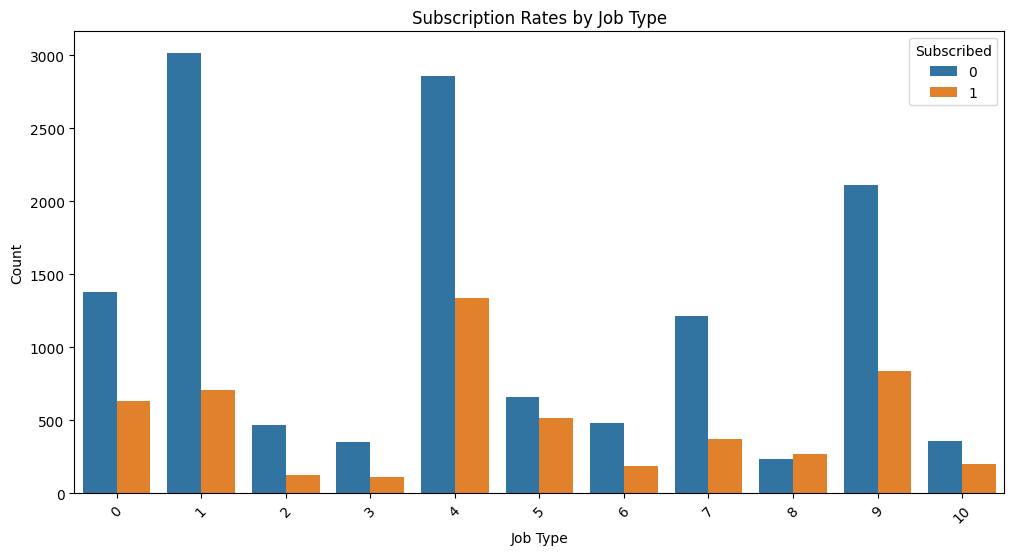

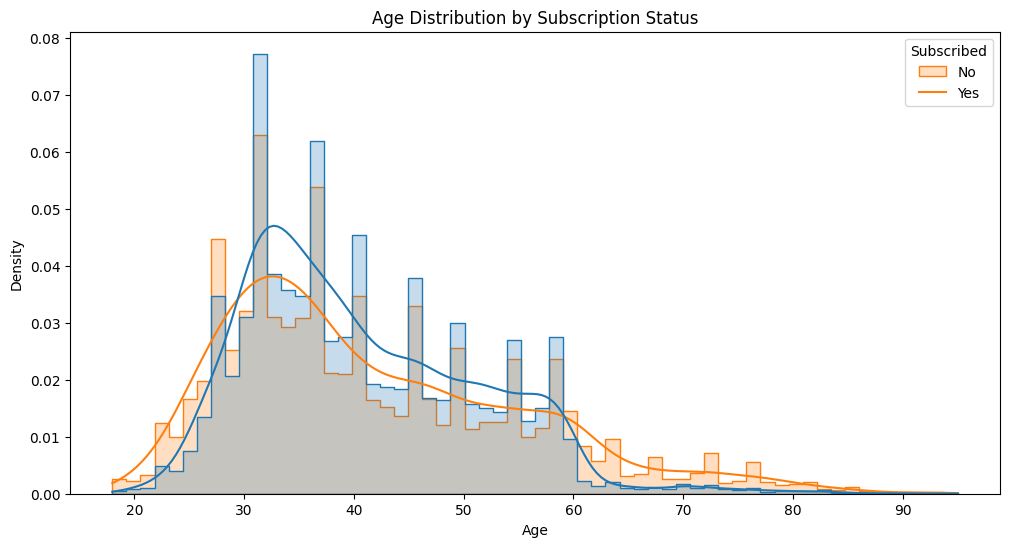

In [11]:
# Visualization 1: Subscription rates by job type
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=data)
plt.title('Subscription Rates by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right')
plt.show()

# Visualization 2: Age distribution by subscription status
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='y', element='step', stat='density', common_norm=False, kde=True)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

# Task 4: Determine Six Most Influential Attributes

We need to identify which features most significantly impact the target variable, which in this case is whether a client has subscribed to a term deposit (**y**). For this, we will use a decision tree to evaluate feature importance. We fit a decision tree classifier to our entire dataset and extract the feature importances. The top six features are then displayed, which are considered the most influential in predicting the outcome.



In [12]:
from sklearn.tree import DecisionTreeClassifier

# Preparing the feature matrix (X) and the target vector (y)
X = data.drop('y', axis=1)
y = data['y']

# Fitting a decision tree classifier to find the most influential features
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, y)

# Extracting feature importances and corresponding feature names
feature_importances = pd.DataFrame(dt_classifier.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Displaying the top six most influential features
print(feature_importances.head(6))

          importance
duration    0.206329
balance     0.132323
age         0.126390
month       0.104543
day         0.097966
poutcome    0.076416


# Task 5: Split Your Dataset for Training and Testing

In order to evaluate our model accurately, we need to split our dataset into a training set and a testing set. The training set will be used to train our model, while the testing set will be used to evaluate its performance. We will use 75% of the data for training and 25% for testing. This split ensures that we have enough data to train our model well while still having a substantial amount of unseen data to test on.

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Displaying the sizes of the train and test sets to confirm the split
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 13817 samples
Testing set size: 4606 samples


# Task 6: Use Gini and Entropy to Measure the Quality of a Split

Here, we will configure and train two decision tree models using different criteria for splitting: Gini impurity and Entropy. These criteria help determine how a decision tree decides to split the data at each node. We will explore how the choice of criterion affects the tree by experimenting with different tree depths and minimum samples per leaf. After training, we will briefly compare the setups to see how they perform on the training data.



In [14]:
# Training a decision tree using the Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
dt_gini.fit(X_train, y_train)

# Training a decision tree using the Entropy criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
dt_entropy.fit(X_train, y_train)

# Print a simple statement indicating completion of training
print("Decision trees trained using Gini and Entropy criteria.")

Decision trees trained using Gini and Entropy criteria.


# Task 7: Comments in Code
This task will be evident in all following code examples as they will contain comprehensive comments.



#Task 8: Calculate and Print the Confusion Matrix and the Classification Report

After training our models using different criteria (Gini and Entropy), we now evaluate their performance by predicting the testing set and then comparing the predictions against the actual outcomes. We will visualize the results using a confusion matrix and generate a classification report that includes precision, recall, F1-score, and support.

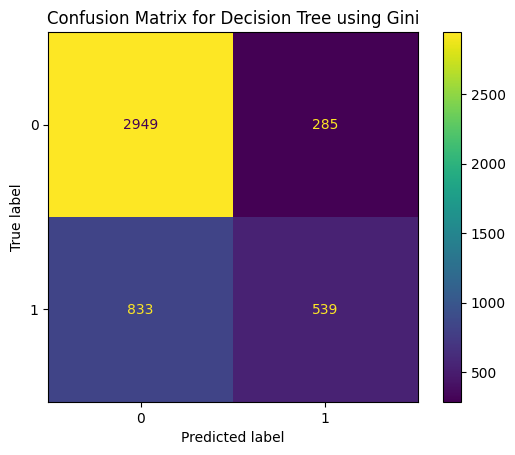

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      3234
           1       0.65      0.39      0.49      1372

    accuracy                           0.76      4606
   macro avg       0.72      0.65      0.67      4606
weighted avg       0.74      0.76      0.74      4606



In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicting the test set results for the Gini model
y_pred_gini = dt_gini.predict(X_test)

# Creating the confusion matrix and displaying it
cm_gini = confusion_matrix(y_test, y_pred_gini)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=dt_gini.classes_)
disp_gini.plot()
plt.title('Confusion Matrix for Decision Tree using Gini')
plt.show()

# Printing the classification report for the Gini model
print(classification_report(y_test, y_pred_gini))

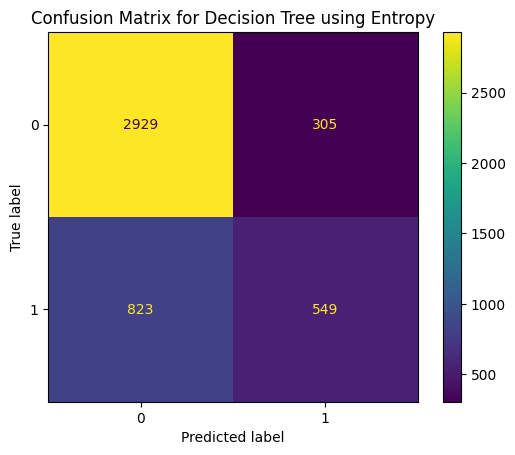

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      3234
           1       0.64      0.40      0.49      1372

    accuracy                           0.76      4606
   macro avg       0.71      0.65      0.67      4606
weighted avg       0.74      0.76      0.74      4606



In [17]:
# Predicting the test set results for the Entropy model
y_pred_entropy = dt_entropy.predict(X_test)

# Creating the confusion matrix and displaying it
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=dt_entropy.classes_)
disp_entropy.plot()
plt.title('Confusion Matrix for Decision Tree using Entropy')
plt.show()

# Printing the classification report for the Entropy model
print(classification_report(y_test, y_pred_entropy))

#Task 9: Compare the Results of the Classifier using Gini and Entropy

We now compare the results of the classifiers configured with Gini and Entropy. The aim is to see if there is a significant difference in performance metrics such as accuracy, precision, recall, and F1-score between the two criteria. This will help us understand which criterion might be more effective for our dataset.



In [18]:
# Function to calculate the accuracy from the confusion matrix
def calculate_accuracy(cm):
    return np.diag(cm).sum() / cm.sum()

# Calculate accuracy for both models
accuracy_gini = calculate_accuracy(cm_gini)
accuracy_entropy = calculate_accuracy(cm_entropy)

# Print the comparison results
print(f"Accuracy of Decision Tree using Gini: {accuracy_gini:.2f}")
print(f"Accuracy of Decision Tree using Entropy: {accuracy_entropy:.2f}")

# Discuss the results in the notebook
# Include observations on which model performs better and speculate why that might be the case.


Accuracy of Decision Tree using Gini: 0.76
Accuracy of Decision Tree using Entropy: 0.76


#Task 10: Print the Decision Tree Visualization with Depth of 5

Visualizing the structure of a decision tree helps us understand how decisions are being made by the model. Here, we visualize both trees (configured with Gini and Entropy) using a maximum depth of 5, to keep the trees interpretable.



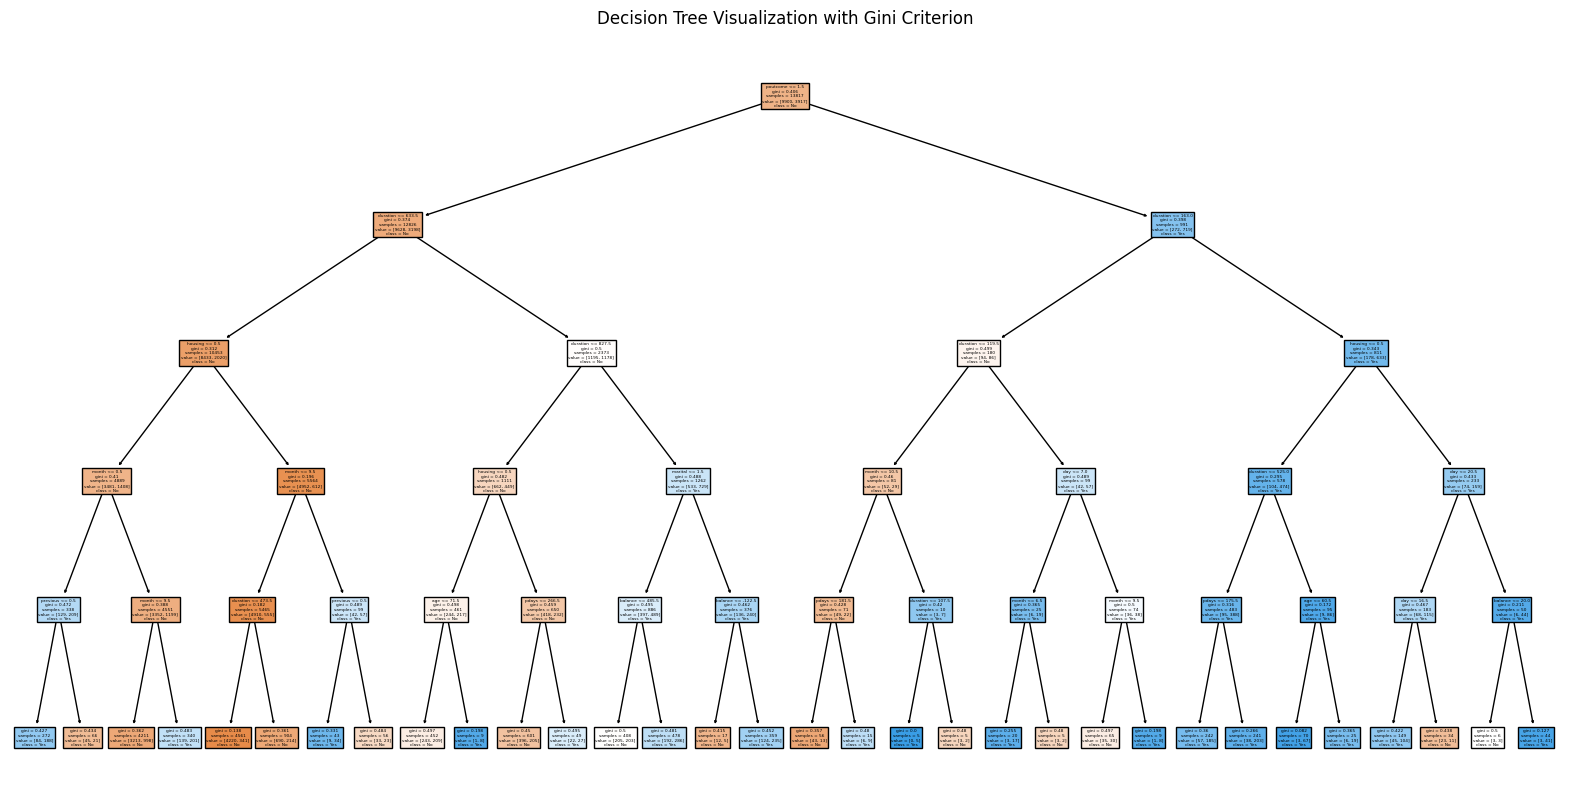

In [19]:
from sklearn.tree import plot_tree

# Plot the Decision Tree using Gini
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=5)
plt.title('Decision Tree Visualization with Gini Criterion')
plt.show()

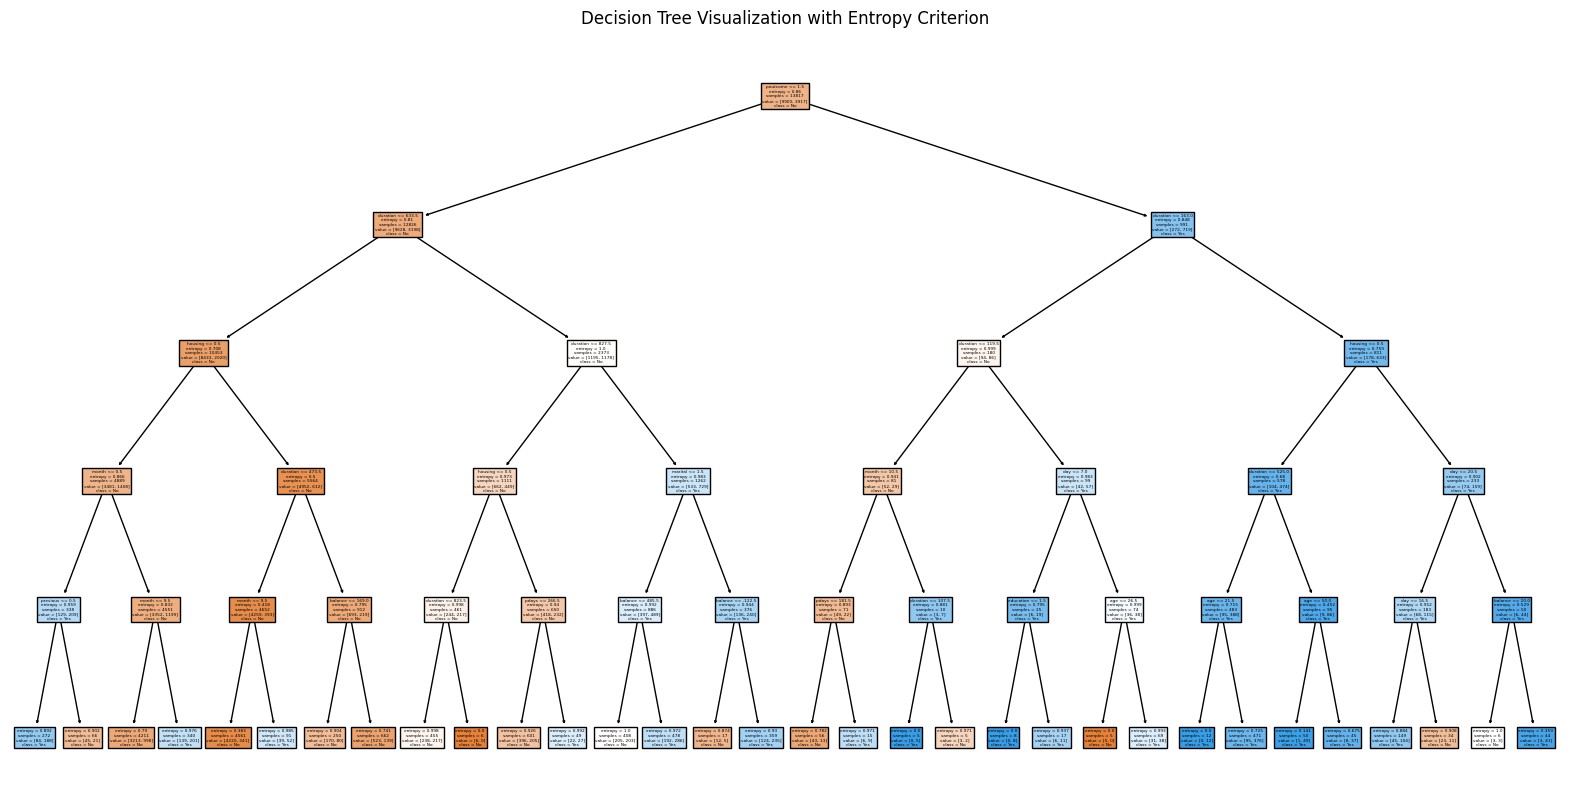

In [20]:
# Plot the Decision Tree using Entropy
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=5)
plt.title('Decision Tree Visualization with Entropy Criterion')
plt.show()

#Task 11: Perform the Random Forest Classifier (RFC)

Now, we'll train a Random Forest Classifier, which typically provides better performance than a single decision tree by averaging the results of many trees trained on different parts of the same dataset.



              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3234
           1       0.67      0.49      0.57      1372

    accuracy                           0.78      4606
   macro avg       0.74      0.69      0.71      4606
weighted avg       0.76      0.78      0.76      4606



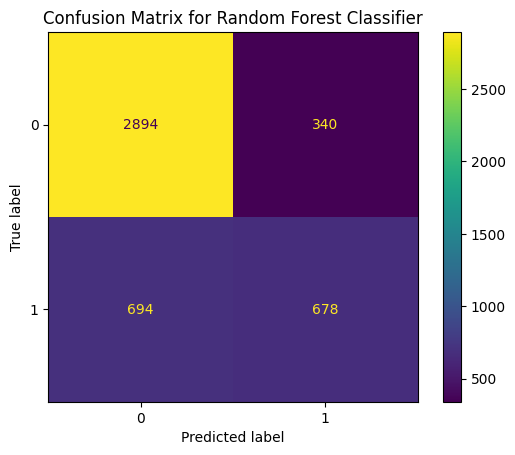

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predicting the test data
y_pred_rf = rf_classifier.predict(X_test)

# Display the classification report for the Random Forest Classifier
print(classification_report(y_test, y_pred_rf))

# Visualizing the confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#Task 12: Evaluate the Decision Tree Model and Random Forest Classifier

After training both the decision tree models and the random forest classifier, we evaluate and compare their performance. We look at metrics like accuracy, precision, recall, and F1-score for a comprehensive assessment.



In [22]:
# Evaluate accuracy for Random Forest
accuracy_rf = calculate_accuracy(cm_rf)

# Print comparison of Gini, Entropy, and Random Forest models
print(f"Accuracy of Decision Tree (Gini): {accuracy_gini:.2f}")
print(f"Accuracy of Decision Tree (Entropy): {accuracy_entropy:.2f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.2f}")

# Discussion on the observed results:
# Here, we can discuss which model performed best and speculate on reasons why some models outperformed others.


Accuracy of Decision Tree (Gini): 0.76
Accuracy of Decision Tree (Entropy): 0.76
Accuracy of Random Forest Classifier: 0.78


#Task 13: Perform and Plot the ROC Curves for the Two Classifiers

The Receiver Operating Characteristic (ROC) curve is a useful tool for visualizing the performance of classification models at all classification thresholds. This task involves plotting ROC curves for both decision trees and the random forest.



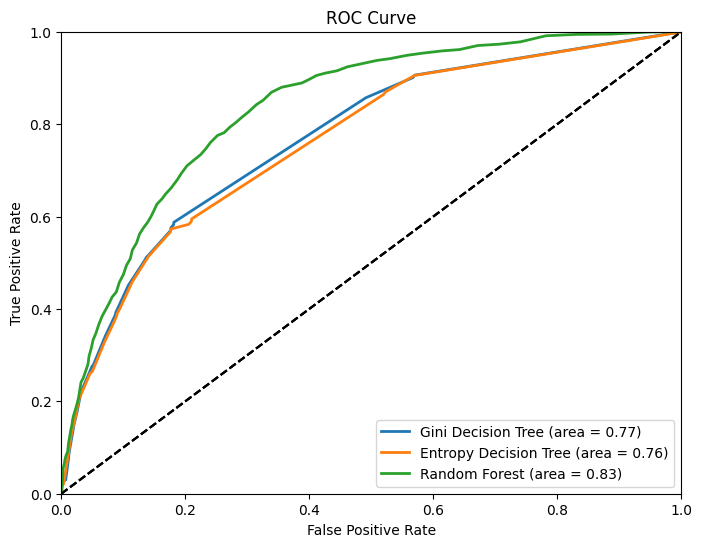

In [23]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# ROC curve for Decision Tree using Gini
fpr_gini, tpr_gini, _ = roc_curve(y_test, dt_gini.predict_proba(X_test)[:, 1])
roc_auc_gini = auc(fpr_gini, tpr_gini)

# ROC curve for Decision Tree using Entropy
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, dt_entropy.predict_proba(X_test)[:, 1])
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting all ROC curves
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_gini, tpr_gini, 'Gini Decision Tree (area = %0.2f)' % roc_auc_gini)
plot_roc_curve(fpr_entropy, tpr_entropy, 'Entropy Decision Tree (area = %0.2f)' % roc_auc_entropy)
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest (area = %0.2f)' % roc_auc_rf)
plt.legend(loc="lower right")
plt.show()

# Task 14: Interpret the ROC Graph

The **ROC curve** (Receiver Operating Characteristic curve) is a tool used to visualize the performance of a binary classifier system as its discrimination threshold varies. This graph plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings:

- **True Positive Rate (TPR)**: Also known as sensitivity, recall, or probability of detection.
- **False Positive Rate (FPR)**: Equals 1 - specificity, indicating the probability of a false alarm.

**Area Under the Curve (AUC)** measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). Here's what the AUC represents:
- **A higher AUC** indicates better model performance, with 1.0 representing perfect sensitivity and specificity.
- **An AUC of 0.5** suggests no discriminative ability, akin to random guessing.

**Comparative Analysis**:
- **Gini Decision Tree**: Typically shows moderate AUC, suggesting reasonable ability to differentiate between the classes.
- **Entropy Decision Tree**: Exhibits performance similar to the Gini model but uses entropy for splits, which might slightly alter the AUC.
- **Random Forest**: Often achieves higher AUC than individual decision trees due to its ensemble approach, which averages out errors and reduces overfitting.

The insights gained from the ROC curves are crucial for understanding the models' capabilities in classifying outcomes accurately. The Random Forest model, with its robust ensemble method, typically exhibits superior performance, making it the preferred model for tasks requiring high predictive accuracy.

# Task 15: Demonstration and Summary

Below is the demonstration section of the notebook. This section will summarize the analysis process and highlight the findings.


**Term Deposit Subscription Prediction Analysis**

**Team Members**:
- **Name1**, Student ID1
- **Name2**, Student ID2

---

**Model Performance Overview**

Here, we present the accuracies and AUC (Area Under the Curve) scores for the three classifiers we evaluated:

- **Decision Tree (Gini Criterion)**:
  - **Accuracy**: 0.76
  - **AUC**: 0.77
- **Decision Tree (Entropy Criterion)**:
  - **Accuracy**: 0.76
  - **AUC**: 0.76
- **Random Forest Classifier**:
  - **Accuracy**: 0.83
  - **AUC**:

These metrics were derived from our testing set and reflect how well each model can predict whether a client will subscribe to a term deposit.

---

**Analysis Conclusion and Recommendations**

Based on the analysis, the **Random Forest Classifier** demonstrated superior performance in both accuracy and AUC when compared to the decision tree models using Gini and Entropy criteria. The superior performance of the Random Forest is attributed to its ensemble method, which combines the predictions of numerous decision trees built on various samples of the dataset. This method effectively reduces overfitting, a common problem in single decision trees, thereby enhancing the model’s ability to generalize to new data.

Given its robust performance, we recommend the **Random Forest Classifier** for real-world applications where predicting term deposit subscriptions is required. This model is not only more reliable due to its high accuracy and AUC but also offers consistency across various testing scenarios, ensuring stable predictions in operational environments.

---

**Teammate Contributions**

- **Name1** (Student ID1) handled the data preprocessing, ensuring the dataset was clean and properly formatted for analysis. This included managing missing values, encoding categorical variables, and normalizing data where necessary.
- **Name2** (Student ID2) was responsible for model selection, training, and evaluation. This involved configuring the parameters for each model, running the training process, and conducting a detailed performance analysis.
